# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

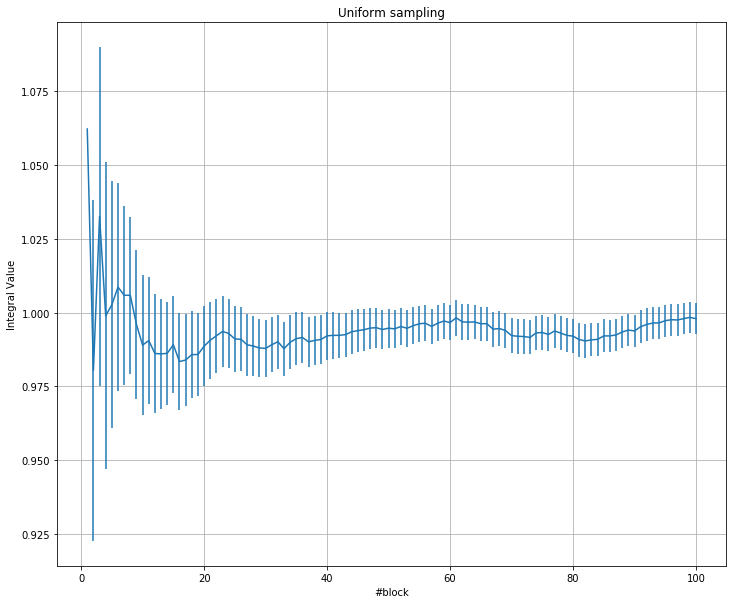

In [6]:
n, av, er = np.loadtxt('es2.1/uniform.out', delimiter=' ',usecols=(0,1,2), unpack=True)
plt.figure(figsize=(12,10))
plt.errorbar(n,av, yerr= er)
plt.grid()
plt.xlabel('#block')
plt.ylabel('Integral Value')
plt.title('Uniform sampling')

plt.show()

For the importance sampling the choosen distribution is the one obtained from the line trangent to the integrand in $x = 1/2$. 

$$ y = - x \dfrac{\pi^{2}}{4\sqrt{2}} + \dfrac{\pi^{2}}{8\sqrt{2}} + \dfrac{\pi}{2\sqrt{2}}$$

The area under this function in the interval $x\in [0;1]$, is $\dfrac{\pi}{2\sqrt{2}}$.

So we can write the cumulative of this distribution as:

$$  \dfrac{\pi}{2\sqrt{2}} \rho(x) = \int_{0}^{x}\left[- x' \dfrac{\pi^{2}}{4\sqrt{2}} + \dfrac{\pi^{2}}{8\sqrt{2}} + \dfrac{\pi}{2\sqrt{2}}\right]dx'  $$

inverting it we get:

$$ x = \dfrac{\frac{\pi}{4} + 1 -  \sqrt{ \left(\frac{\pi}{4} + 1\right)^{2} - \pi \rho  } }{\frac{\pi}{2}}$$ 




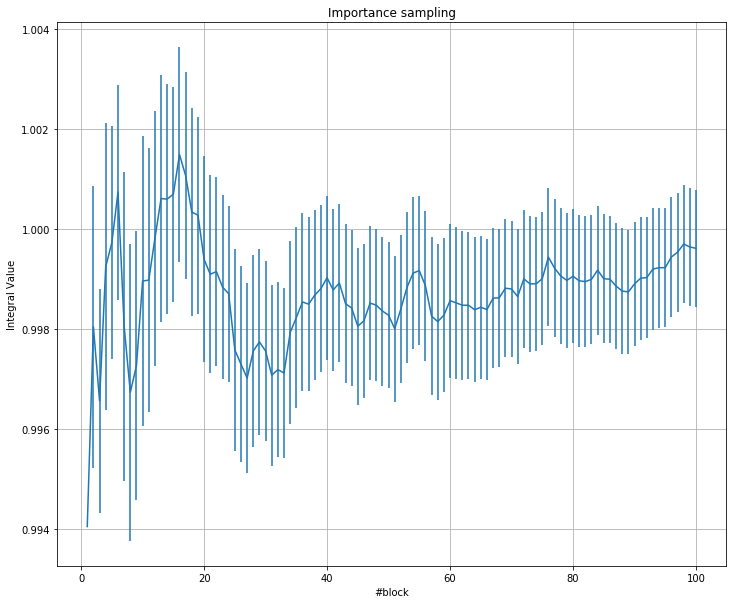

In [7]:
n, av, er = np.loadtxt('es2.1/importance.out', delimiter=' ',usecols=(0,1,2), unpack=True)
plt.figure(figsize=(12,10))

plt.errorbar(n,av, yerr= er)
plt.grid()
plt.xlabel('#block')
plt.ylabel('Integral Value')
plt.title('Importance sampling')

plt.show()

We see that with this method the uncertainty on the integral value is far smaller than in the previous case.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

This task is carried out in the code *es2.2/main.cpp*.
The code was divided in two part. The firs one makes a certain number of walks, each one of $100$ steps, then it calculates the average distance from the origin of the walk. From the data of this part we take the first plot of each following section. The second part the same thing is done but taking the measures of the reached distance after every step. The second plots are taken from this part.

## Discrete Walks


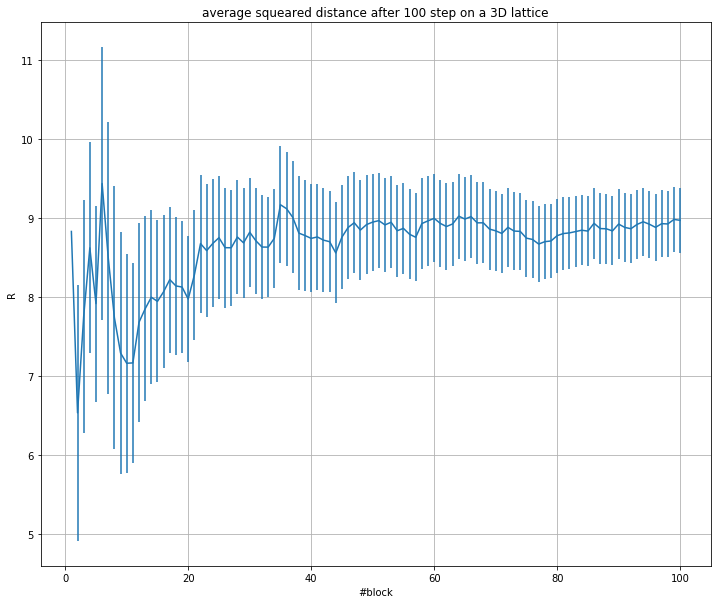

In [8]:
n, av, er = np.loadtxt('es2.2/discrete.out', delimiter=' ',usecols=(0,1,2), unpack=True)
plt.figure(figsize=(12,10))

plt.errorbar(n,av, yerr= er)
plt.grid()
plt.xlabel('#block')
plt.ylabel('R')
plt.title('average squeared distance after 100 step on a 3D lattice')

plt.show()

In [10]:
def sqrt (x, a, b):
    return b*(x**a)

fitted values for r = k* (N^p)
 p  =  0.4983340743919758
 k  =  0.9284216614887119


<Figure size 864x720 with 0 Axes>

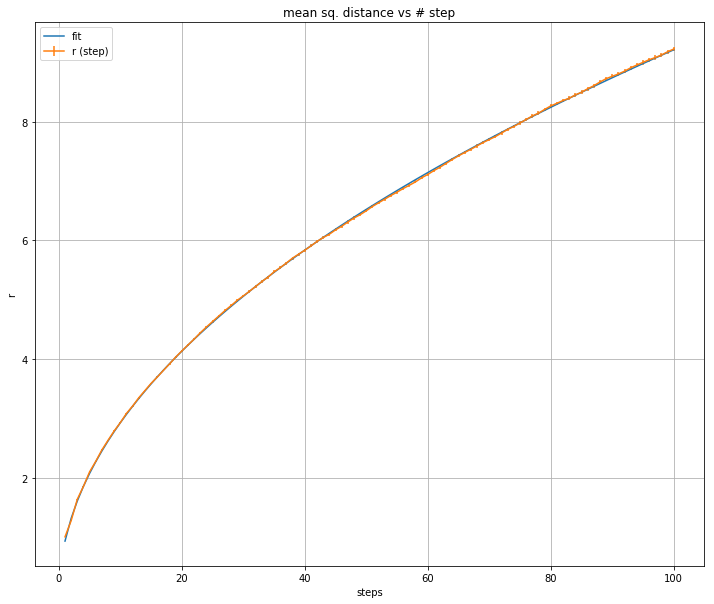

In [11]:
plt.figure(figsize=(12,10))

n, av, er = np.loadtxt('es2.2/discrete_step.out', delimiter='  ',usecols=(0,1,2), unpack=True)

p_opt, p_cov = curve_fit(sqrt, n, av , method='lm')
y_fit = sqrt(n,p_opt[0],p_opt[1])
plt.plot(n,y_fit, label='fit')

print('fitted values for r = k* (N^p)')
print(' p  = ', p_opt[0])
print(' k  = ', p_opt[1])


plt.errorbar(n,av, yerr= er, label='r (step)')
plt.grid()
plt.xlabel('steps')
plt.ylabel('r')
plt.title('mean sq. distance vs # step')
plt.legend()

plt.show()

In the discrete case we find a very good accordance with a diffusive behaviour.

## Continuous Walk

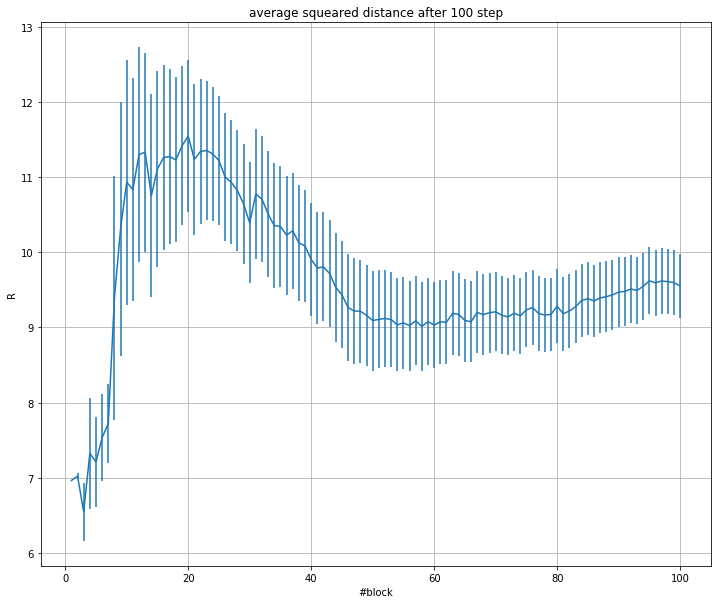

In [12]:
n, av, er = np.loadtxt('es2.2/continuous.out', delimiter=' ',usecols=(0,1,2), unpack=True)
plt.figure(figsize=(12,10))

plt.errorbar(n,av, yerr= er)
plt.grid()
plt.xlabel('#block')
plt.ylabel('R')
plt.title('average squeared distance after 100 step')

plt.show()

fitted values for r = k* (N^p)
 p  =  0.49297368521496887
 k  =  0.9417785982112068


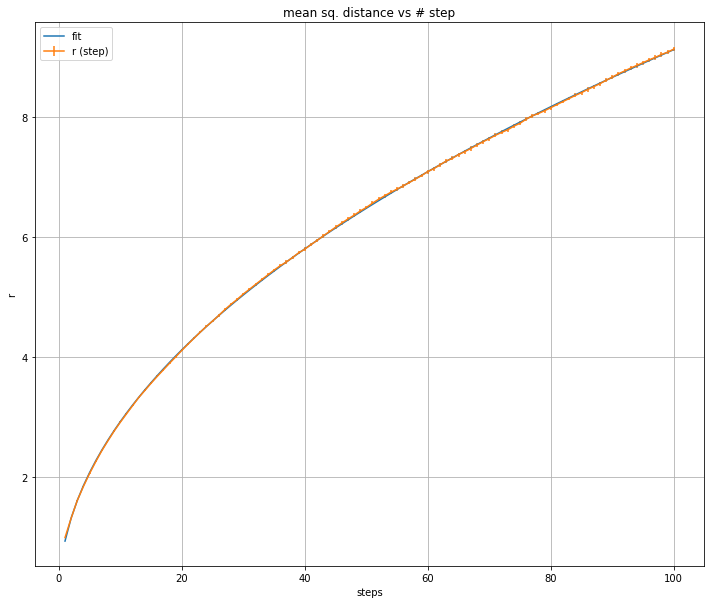

In [13]:
n, av, er = np.loadtxt('es2.2/continuous_step.out', delimiter='  ',usecols=(0,1,2), unpack=True)
plt.figure(figsize=(12,10))

p_opt, p_cov = curve_fit(sqrt, n, av , method='lm')
y_fit = sqrt(n,p_opt[0],p_opt[1])
plt.plot(n,y_fit, label='fit')

print('fitted values for r = k* (N^p)')
print(' p  = ', p_opt[0])
print(' k  = ', p_opt[1])

plt.errorbar(n,av, yerr= er, label='r (step)')
plt.grid()
plt.xlabel('steps')
plt.ylabel('r')
plt.title('mean sq. distance vs # step')
plt.legend()


plt.show()

Also in this continuous case we get a good fit with the diffusive behaviour.